# Data Science Mathematics
# K-Means Clustering
# In-Class Activity

Let's analyze our data set using the K-means module of Python.  First, import the relevant libraries.

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, matthews_corrcoef
import numpy as np
import math

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


Now let's import our dataset as a Numpy array.

In [2]:
data=np.array([[8,22,62],
[15,51,85],
[9,44,121],
[8,51,136],
[8,20,93],
[15,64,124],
[14,56,101],
[5,10,80],
[5,18,73],
[9,26,79]])



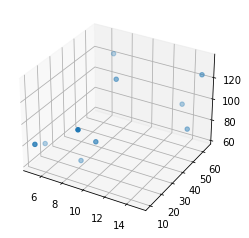

In [3]:
# I will try to plot this on a 3d plot to crazy-check the process as it's going on
# this is the initial data, in default blue color
fig1 = plt.figure(1)
ax = plt.axes(projection='3d')
data_transposed = data.transpose()
ax.scatter3D(data_transposed[0], data_transposed[1], data_transposed[2])

Now let's instantiate our k-means object, trained on our data set.

In [4]:
# per hw instructions, we'll start with a good guess of two centroids at the below points
init_points = np.array([[10, 20, 80], [10, 50, 110]])

# now do the kmeans function
kmeans = KMeans(n_clusters=2, init=init_points, verbose=0).fit(data)

We can use the "labels" method to get our data labels.  Each different integer represents a different cluster.

In [5]:
cl_labels = kmeans.labels_
print(cl_labels)

[0 1 1 1 0 1 1 0 0 0]


Do the lables make sense based on our input data?  Go back to the in-class activity and see if the labels are the same.  Note that this algorithm may choose a different label convention (i.e., not 1=Military and 0=Non-Military, like in our example).  What we are interested in is the correct pattern in the label sequence.

Now let's find our centroids.  Do they match what you calculated by hand?

In [6]:
cl_centers = kmeans.cluster_centers_
print(cl_centers)

[[  7.   19.2  77.4]
 [ 12.2  53.2 113.4]]


***Now save your output.  Go to File -> Print Preview and save your final output as a PDF.  Turn in to your Instructor, along with any additional sheets.

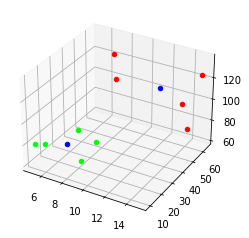

In [7]:
# we could try to visualize this to easily validate if it "looks" right
# figure 2
fig2 = plt.figure(2)
ax = plt.axes(projection='3d')

#plot data points, label one cluster as red and the other as green
for i in range(len(data_transposed[0])):
    if cl_labels[i]:
        cl_color = "#FF0000" #red
    else:
        cl_color = "#00FF00" #green
    ax.scatter(data_transposed[0][i], data_transposed[1][i], data_transposed[2][i], color=cl_color)

#plot centers
for i in range(len(cl_centers)):
    ax.scatter(cl_centers[i][0], cl_centers[i][1], cl_centers[i][2], depthshade=True, color="#0000FF") #blue

b)	Determine if convergence occurred after two, five iterations of k-means.

In [8]:
# we can find this through n_iter:
kmeans.n_iter_

2

meaning it took only 2 iterations to converge

c)	How well did your algorithm cluster military personnel versus non-military personnel?  Construct a confusion matrix, and calculate the Matthews’ Correlation Coefficient (write the code vs using numpy---feel free to check with numpy).

In [9]:
# first we set the "truth" values from the hw assignment
trues = np.array([1,0,0,0,1,0,0,1,1,1])
print(trues)


[1 0 0 0 1 0 0 1 1 1]


In [10]:
# (we already have the kmeans labels saved as cl_labels)
print(cl_labels)

[0 1 1 1 0 1 1 0 0 0]


In [11]:
#calucalte confusion matrix with custom algo:
cmatrix = np.array( [(0,0),(0,0)])
for i in range(len(trues)):
    if (trues[i] == 1) and (cl_labels[i] == 1):
        cmatrix[0][0] += 1 #true pos
    elif (trues[i] == 0) and (cl_labels[i] == 1):
        cmatrix[1][0] += 1 #false pos
    elif (trues[i] == 1) and (cl_labels[i] == 0):
        cmatrix[0][1] += 1 #false neg
    elif (trues[i] == 0) and (cl_labels[i] == 0):
        cmatrix[1][1] += 1 #true neg
    else:
        assert("wha?")
print(cmatrix)


[[0 5]
 [5 0]]


In [12]:
# double check our work by using scikit learn's calc confusionmatrix
confusion_matrix(trues, cl_labels)

array([[0, 5],
       [5, 0]], dtype=int64)

In [13]:
#so now we can calculate the matthews correlation coefficient
TP=cmatrix[0][0]
TN=cmatrix[1][1]
FP=cmatrix[1][0]
FN=cmatrix[0][1]

matt_coeff = (TP * TN) - (FP * FN)
matt_coeff /= math.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print(matt_coeff)


-1.0


In [14]:
# this answer makes sense when looking at the data. still, we can double check
# with the sci kit 
matthews_corrcoef(trues, cl_labels)

-1.0

By coming at as -1, this means that it is perfectly correlated (it's -1 instead of +1 only because the convergence function picks either a "0" case or a "1" case as a placeholder for military or nonmilitary, which could be set as eitehr way). An answer of 0 would be perfectly uncorrelated. 

d)	You selected three features to use in this computation because you determined that they are the three most correlated features with “military” status.  While adding additional features up to a certain point will enhance clustering model accuracy, adding too many features diminishes accuracy.  Explain why this is true.

This is true because as you increase the number of dimensions, the distance between a centroid and a point increases exponentially in proportion to the number of dimensions.  In class, it was explained by demonstrating that the space in a volume of a sphere is larger than a square, and aa hypersphere by an exponent is larger than a sphere, etc.  As Grus puts it, each dimension adds the possiblity that a point will be vastly far away from other points. As the number of dimensions increases, the ratio of the closest distance to the farthest distance gets significantly less significant (approaches 1).  It's thus harder and harder to divine any meaning from any two points that are "close", because tehy won't be much closer than average, because the average is so vast.